# K-Nearest Neighbours Classifier

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [73]:
cleaned_dataset = pd.read_csv('../preparation/dataframes/cleaned_dataset.csv', index_col=0)
X = cleaned_dataset.drop('outcome', axis=1)
y = cleaned_dataset['outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

## Tuning the Hyperparameters

### Hyperparameters to be tuned
1.	```n_neighbors```
    - The number of neighbours
2. ```p```
    - Power parameter for the Minkowski metric
    - ```p=1``` for Manhattan distance, ```p=2``` for Euclidean

In [4]:
scores = {}
scores_list = []
for k in range(1, 500):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores[k] = accuracy_score(y_test, y_pred)
    scores_list.append(accuracy_score(y_test, y_pred))


In [22]:
px.line(
    x=range(1, 500),
    y=scores_list,
    labels={'x': 'Value of K for KNN', 'y': 'Testing Accuracy'},
    title='The accuracy score of the K-Nearest Neighbours Classifier as K is varied')


This plot shows a sharp drop and then rise in the accuracy of the KNN classifier before begininning to level out at a value of around ```K=20```. The accuracy remains at roughly 0.49 and although difficult to see, the peak is in the range ```300<K<350```. Hence, these are the values that will be tested using K-Fold Validation & Grid Search.

In [25]:
n_neighbors = list(range(300, 351))
p=[1, 2]
hyperparameters = dict(n_neighbors=n_neighbors, p=p)

knn = KNeighborsClassifier()
kfold = KFold(n_splits=5, shuffle=True, random_state=13)
clf = GridSearchCV(knn, hyperparameters, cv=kfold)
best_model = clf.fit(X, y)

print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
print('Best p:', best_model.best_estimator_.get_params()['p'])

Best n_neighbors: 311
Best p: 2


In [75]:
model = KNeighborsClassifier(n_neighbors=311, p=2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'Best Accuracy: {accuracy_score(y_test, y_pred)}')

Best Accuracy: 0.4903180329228345


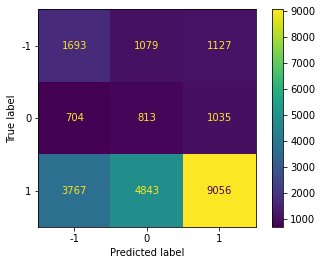

In [51]:
cm = confusion_matrix(y_pred, y_test)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()
plt.show()